## Кейс "Кластеризация покупателей"

### Описание данных

Имеются данные по 34 опрошенным покупателям.

Компания провела опрос с целью выявить, какие напитки предпочитают респонденты.

Опрошенные указывали, какие напитки из предложенного списка они пьют регулярно.

В списке присутствовали:

* Coca-Cola
* Диетическая Coca-Cola
* Диетическая Pepsi-Cola
* Диетический 7-Up
* Pepsi-Cola
* Спрайт
* Минеральная вода
* 7-Up

### Постановка задачи

Разбейте опрошенных покупателей на сегменты и охарактеризуйте каждый полученный сегмент. Определите какие рекламные предложения можно давать полученным сегментам.

### Загрузка данных и их обработка

In [1]:
# Загрузим все необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('beverage.csv', sep = ';', index_col = 'numb.obs')

In [3]:
df

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
numb.obs,,,,,,,,
1,1,0,0,0,1,1,0,1
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,0
5,1,0,0,0,1,0,0,0
6,1,0,0,0,1,1,0,0
7,0,1,1,1,0,0,1,0
8,1,1,0,0,1,1,0,1
9,1,1,0,0,0,1,1,1


Данные находятся в одних единицах измерения и одного масштаба, поэтому не нужно проводить стандартизацию.

### Построение модели

<font color='blue'>**Задание 1.**</font>

Разбейте опрошенных на сегменты с помощью иерархического кластерного анализа.

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [5]:
link = linkage(df, 'ward', 'euclidean')
link

array([[ 5.        , 10.        ,  0.        ,  2.        ],
       [ 1.        ,  2.        ,  0.        ,  2.        ],
       [ 4.        , 35.        ,  0.        ,  3.        ],
       [ 3.        , 22.        ,  0.        ,  2.        ],
       [20.        , 36.        ,  0.        ,  4.        ],
       [ 6.        , 33.        ,  0.        ,  2.        ],
       [ 9.        , 30.        ,  0.        ,  2.        ],
       [13.        , 28.        ,  0.        ,  2.        ],
       [32.        , 40.        ,  0.        ,  3.        ],
       [17.        , 23.        ,  0.        ,  2.        ],
       [11.        , 26.        ,  0.        ,  2.        ],
       [14.        , 29.        ,  0.        ,  2.        ],
       [25.        , 37.        ,  0.        ,  3.        ],
       [31.        , 45.        ,  0.        ,  3.        ],
       [21.        , 38.        ,  0.        ,  5.        ],
       [ 0.        ,  7.        ,  1.        ,  2.        ],
       [18.        , 27.

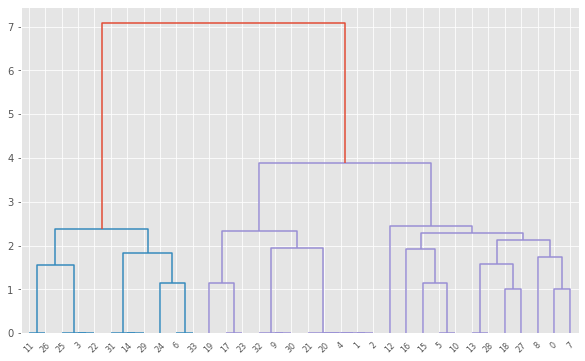

In [6]:
plt.figure(figsize = (10,6)) # Размер графика
dn = dendrogram(link) 

In [7]:
dist = link[:, 2]
dist

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 1.15470054, 1.15470054, 1.15470054,
       1.54919334, 1.58113883, 1.73205081, 1.82574186, 1.91485422,
       1.93649167, 2.12132034, 2.27636073, 2.33711814, 2.37920282,
       2.446395  , 3.87646865, 7.09212963])

Text(15, 3, '3 clusters')

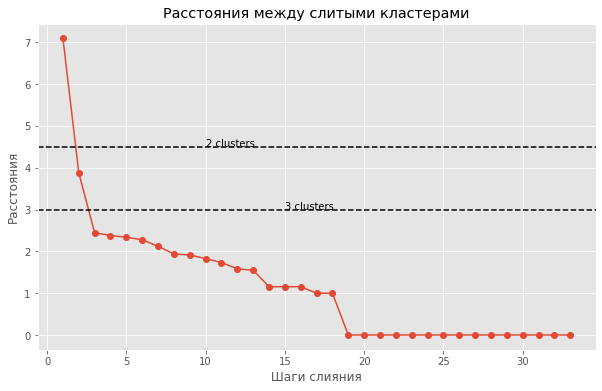

In [27]:
plt.figure(figsize = (10,6)) 
dist_rev = dist[::-1] 
idxs = range(1, len(dist) + 1) 
plt.plot(idxs, dist_rev, marker = 'o') 
plt.title('Расстояния между слитыми кластерами') # Заголовок графика
plt.xlabel('Шаги слияния') # Подпись оси Х
plt.ylabel('Расстояния') # Подпись оси Y
plt.axhline(4.5, c = 'k', linestyle = 'dashed') # Добавили нижнюю пунктирную линию
plt.axhline(3, c = 'k', linestyle = 'dashed') # Добавили верхнюю пунктирную линию
plt.text(10, 4.5, '2 clusters') # Подписали нижнюю пунктирную линию
plt.text(15, 3, '3 clusters') # Подписали верхнюю пунктирную линию

In [28]:
df['Кластер'] = fcluster(link, 3, criterion = 'distance')
df

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP,Кластер
numb.obs,,,,,,,,,
1,1,0,0,0,1,1,0,1,3
2,1,0,0,0,1,0,0,0,2
3,1,0,0,0,1,0,0,0,2
4,0,1,0,1,0,0,1,0,1
5,1,0,0,0,1,0,0,0,2
6,1,0,0,0,1,1,0,0,3
7,0,1,1,1,0,0,1,0,1
8,1,1,0,0,1,1,0,1,3
9,1,1,0,0,0,1,1,1,3


In [29]:
df['Кластер'] = fcluster(link, 3, criterion = 'maxclust')
df

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP,Кластер
numb.obs,,,,,,,,,
1,1,0,0,0,1,1,0,1,3
2,1,0,0,0,1,0,0,0,2
3,1,0,0,0,1,0,0,0,2
4,0,1,0,1,0,0,1,0,1
5,1,0,0,0,1,0,0,0,2
6,1,0,0,0,1,1,0,0,3
7,0,1,1,1,0,0,1,0,1
8,1,1,0,0,1,1,0,1,3
9,1,1,0,0,0,1,1,1,3


In [30]:
df.groupby('Кластер').mean()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
Кластер,,,,,,,,
1,0.00,1.000000,0.545455,0.545455,0.000000,0.000000,0.909091,0.000000
2,1.00,0.272727,0.090909,0.000000,1.000000,0.000000,0.000000,0.272727
3,0.75,0.250000,0.083333,0.083333,0.416667,0.916667,0.083333,0.500000


# Рекламная кампания. Предпочитаемый выбор

Опрошенным людям из кластера 1 можно рекламировать D_COKE, TAB
Опрошенным людям из кластера 2 можно рекламировать COKE, PEPSY
Опрошенным людям из кластера 3 можно рекламировать COKE, SPRYTE


<font color='blue'>**Задание 2.**</font>

Определите количество кластеров и охарактеризуйте их. Подумайте, какие рекламные акции можно было бы провести в том или ином сегменте.

# Вывод о предпочтениях

Кластеров 3, люди из первого кластера больше предпочитают диетические напитки , Люди из второго кластера предпочитают PEPSI и COKE, люди из третьего кластера любят сладкую газировку